In [41]:
import ast
from bs4 import BeautifulSoup
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import re
import requests
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sqlite3
from sqlite3 import Error
import time
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [42]:
# Loading skincare_df data set
skincare_df = pd.read_csv("/Users/florencialeoni/code/i_feel_pretty/data/skincare_df.csv")

In [43]:
skincare_df.head()

,Unnamed: 0,brand,name,price,n_of_reviews,n_of_loves,review_score,size,clean_product,category_Anti-Aging,...,category_Setting_Spray_&_Powder,category_Sheet_Masks,category_Skincare,category_Tinted_Moisturizer,category_Toners,category_Tools,category_Value_&_Gift_Sets,reviews_to_loves_ratio,return_on_reviews,price_per_ounce
0,0,Drunk Elephant,Protini Polypeptide Moisturizer,68.0,1000,136008,4.2097,1.69,1,0,...,0,0,0,0,0,0,0,0.74,0.42,40.24
1,1,La Mer,Crreme de la Mer,175.0,493,61648,4.0974,1.00,0,0,...,0,0,0,0,0,0,0,0.80,0.83,175.00
2,2,IT Cosmetics,CC+ Cream with SPF 50+,39.0,2000,188389,4.0403,1.08,0,0,...,0,0,0,0,0,0,0,1.06,0.20,36.11
3,3,Tatcha,The Water Cream,68.0,1000,149323,4.2447,1.70,1,0,...,0,0,0,0,0,0,0,0.67,0.42,40.00
4,4,SK-II,Facial Treatment Essence,179.0,788,68880,4.0622,NaN,0,0,...,0,0,0,0,0,0,0,1.14,0.52,NaN


In [44]:
# Loading pretty_numbers data set
pretty_numbers = pd.read_csv("/Users/florencialeoni/code/i_feel_pretty/data/pretty_numbers.csv")

In [45]:
pretty_numbers.head()

,Unnamed: 0,price,n_of_reviews,n_of_loves,review_score,size,clean_product,category_Anti-Aging,category_BB_&_CC_Cream,category_Bath_&_Shower,...,category_Skincare,category_Tinted_Moisturizer,category_Toners,category_Tools,category_Value_&_Gift_Sets,reviews_to_loves_ratio,return_on_reviews,price_per_ounce,reviews_to_loves_log,return_on_reviews_log
0,0,68.0,1000,136008,4.2097,1.69,1,0,0,0,...,0,0,0,0,0,0.74,0.42,40.24,-0.30,-0.87
1,1,175.0,493,61648,4.0974,1.00,0,0,0,0,...,0,0,0,0,0,0.80,0.83,175.00,-0.22,-0.19
2,2,39.0,2000,188389,4.0403,1.08,0,0,1,0,...,0,0,0,0,0,1.06,0.20,36.11,0.06,-1.61
3,3,68.0,1000,149323,4.2447,1.70,1,0,0,0,...,0,0,0,0,0,0.67,0.42,40.00,-0.40,-0.87
4,4,179.0,788,68880,4.0622,NaN,0,0,0,0,...,0,0,0,0,0,1.14,0.52,NaN,0.13,-0.65


In [106]:
pretty_numbers.columns

Index(['price', 'n_of_reviews', 'n_of_loves', 'review_score', 'size',
       'clean_product', 'category_Anti-Aging', 'category_BB_&_CC_Cream',
       'category_Bath_&_Shower', 'category_Beauty_Supplements',
       'category_Blemish_&_Acne_Treatments', 'category_Blotting_Papers',
       'category_Body_Lotions_&_Body_Oils',
       'category_Cellulite_&_Stretch_Marks',
       'category_Decollete_&_Neck_Creams', 'category_Exfoliators',
       'category_Eye_Creams_&_Treatments', 'category_Eye_Masks',
       'category_Face_Masks', 'category_Face_Oils', 'category_Face_Primer',
       'category_Face_Serums', 'category_Face_Sunscreen',
       'category_Face_Wash_&_Cleansers', 'category_Facial_Peels',
       'category_Foundation', 'category_Hair_Oil', 'category_Highlighter',
       'category_Holistic_Wellness', 'category_Mini_Size',
       'category_Mists_&_Essences', 'category_Moisturizer_&_Treatments',
       'category_Moisturizers', 'category_Night_Creams',
       'category_Setting_Spray_&_Po

In [46]:
# Loading pretty_regression data set
pretty_regression = pd.read_csv("/Users/florencialeoni/code/i_feel_pretty/data/pretty_regression.csv")

In [47]:
pretty_regression.head()

,Unnamed: 0,price,n_of_reviews,n_of_loves,review_score,size,clean_product,return_on_reviews,reviews_to_loves_ratio,price_per_ounce
0,0,68.0,1000,136008,4.2097,1.69,1,0.42,0.74,40.24
1,1,175.0,493,61648,4.0974,1.00,0,0.83,0.80,175.00
2,2,39.0,2000,188389,4.0403,1.08,0,0.20,1.06,36.11
3,3,68.0,1000,149323,4.2447,1.70,1,0.42,0.67,40.00
4,4,179.0,788,68880,4.0622,NaN,0,0.52,1.14,NaN


In [48]:
# Drop Unnamed: 0 column from each dataframe
skincare_df = skincare_df.drop(["Unnamed: 0"], axis=1)
pretty_numbers = pretty_numbers.drop(["Unnamed: 0"], axis=1)
pretty_regression = pretty_regression.drop(["Unnamed: 0"], axis=1)

In [50]:
# Splitting the dataset
train, test = train_test_split(pretty_numbers, test_size=0.2)

In [51]:
# Splitting the dataset
train_1, test_1 = train_test_split(pretty_regression, test_size=0.2)

In [79]:
# Creating variables with training set
n_of_reviews = train["n_of_reviews"].as_matrix(columns=None)
n_of_loves = train["n_of_loves"].as_matrix(columns=None)
reviews_to_loves_ratio = train["reviews_to_loves_ratio"].as_matrix(columns=None)
review_score = train["review_score"].as_matrix(columns=None)

In [95]:
# Use scikit learn method to create polynomial features
poly = PolynomialFeatures(degree=2)

X2_reviews = poly.fit_transform(n_of_reviews.reshape(-1,1))
X2_loves = poly.fit_transform(n_of_loves.reshape(-1,1))
X2_review_love = poly.fit_transform(reviews_to_loves_ratio.reshape(-1,1))

predict_score = poly.fit_transform([review_score])

X2_reviews.shape
review_score.shape

(1351,)

In [82]:
# Linear regression

lr_reviews = LinearRegression()
lr_loves = LinearRegression()
lr_review_love = LinearRegression()

lr_reviews.fit(X2_reviews, review_score)
lr_loves.fit(X2_loves, review_score)
lr_review_love.fit(X2_review_love, review_score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
lr_reviews.coef_

array([ 0.00000000e+00,  4.81234669e-05, -4.09332467e-09])

In [84]:
lr_loves.coef_

array([ 0.00000000e+00,  6.75454967e-07, -2.68856170e-12])

In [85]:
lr_review_love.coef_

array([ 0.00000000e+00,  6.05574361e-03, -2.03358499e-05])

In [86]:
lr_reviews.intercept_

4.1729014652110425

In [87]:
lr_loves.intercept_

4.175854497138892

In [88]:
lr_review_love.intercept_

4.168431515692588

In [98]:
lr_reviews.score(X2_reviews, review_score)

0.0012814138872286884

In [101]:
lr_loves.score(X2_loves, review_score)

0.0004057563667579922

In [102]:
lr_review_love.score(X2_review_love, review_score)

0.0047703989670440095

In [89]:
# Creating variables with test set
n_of_reviews_test = test["n_of_reviews"].as_matrix(columns=None)
n_of_loves_test = test["n_of_loves"].as_matrix(columns=None)
reviews_to_loves_ratio_test = test["reviews_to_loves_ratio"].as_matrix(columns=None)

# Use scikit learn method to create polynomial features
poly = PolynomialFeatures(degree=2)
X2_reviews_test = poly.fit_transform(n_of_reviews_test.reshape(-1,1))
X2_loves_test = poly.fit_transform(n_of_loves_test.reshape(-1,1))
X2_review_love_test = poly.fit_transform(reviews_to_loves_ratio_test.reshape(-1,1))

Text(0, 0.5, 'Review Score')

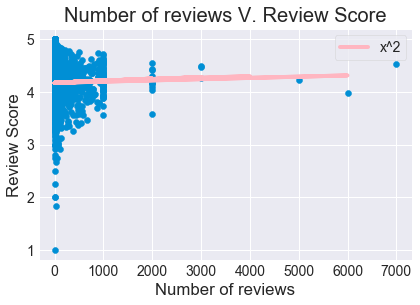

In [100]:
# Plotting polynomial regression
plt.scatter(n_of_reviews, review_score)
plt.plot(n_of_reviews_test, lr_reviews.predict(X2_reviews_test), label = "x^2", color = "lightpink")
plt.title("Number of reviews V. Review Score")
plt.legend()
plt.xlabel("Number of reviews")
plt.ylabel("Review Score")

Text(0, 0.5, 'Review Score')

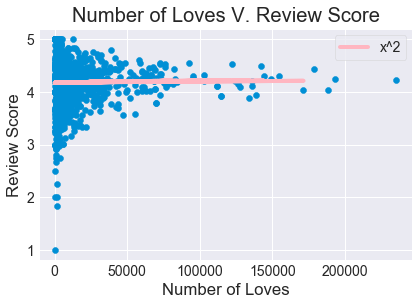

In [91]:
# Plotting polynomial regression
plt.scatter(n_of_loves, review_score)
plt.plot(n_of_loves_test, lr_loves.predict(X2_loves_test), label = "x^2", color = "lightpink")
plt.title("Number of Loves V. Review Score")
plt.legend()
plt.xlabel("Number of Loves")
plt.ylabel("Review Score")

Text(0, 0.5, 'Review Score')

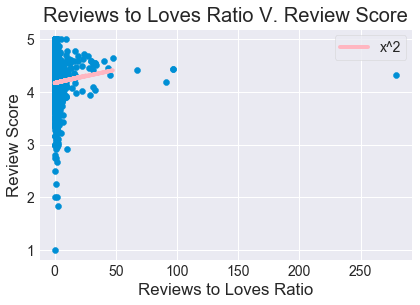

In [92]:
# Plotting polynomial regression
plt.scatter(reviews_to_loves_ratio, review_score)
plt.plot(reviews_to_loves_ratio_test, lr_review_love.predict(X2_review_love_test), label = "x^2", color = "lightpink")
plt.title("Reviews to Loves Ratio V. Review Score")
plt.legend()
plt.xlabel("Reviews to Loves Ratio")
plt.ylabel("Review Score")

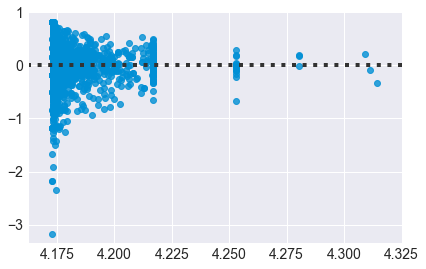

In [93]:
# Residuals, testing for homoscedasticity
sns.residplot(lr_reviews.predict(X2_reviews), review_score)

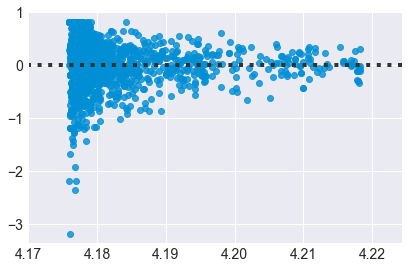

In [103]:
# Residuals, testing for homoscedasticity
sns.residplot(lr_loves.predict(X2_loves), review_score)

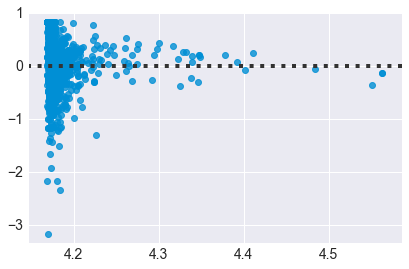

In [104]:
# Residuals, testing for homoscedasticity
sns.residplot(lr_review_love.predict(X2_review_love), review_score)

In [110]:
# Scikit Learn
# Multiple Linear Regression
# Create X and y
feature_cols = ['clean_product', 'category_Anti-Aging', 'category_BB_&_CC_Cream',
               'category_Bath_&_Shower', 'category_Beauty_Supplements',
               'category_Blemish_&_Acne_Treatments', 'category_Blotting_Papers',
               'category_Body_Lotions_&_Body_Oils',
               'category_Cellulite_&_Stretch_Marks',
               'category_Decollete_&_Neck_Creams', 'category_Exfoliators',
               'category_Eye_Creams_&_Treatments', 'category_Eye_Masks',
               'category_Face_Masks', 'category_Face_Oils', 'category_Face_Primer',
               'category_Face_Serums', 'category_Face_Sunscreen',
               'category_Face_Wash_&_Cleansers', 'category_Facial_Peels',
               'category_Foundation', 'category_Hair_Oil', 'category_Highlighter',
               'category_Holistic_Wellness', 'category_Mini_Size',
               'category_Mists_&_Essences', 'category_Moisturizer_&_Treatments',
               'category_Moisturizers', 'category_Night_Creams',
               'category_Setting_Spray_&_Powder', 'category_Sheet_Masks',
               'category_Skincare', 'category_Tinted_Moisturizer', 'category_Toners',
               'category_Tools', 'category_Value_&_Gift_Sets']
X = train[feature_cols]
y = train.review_score

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [111]:
print("Coefficients: ", lm2.coef_)

Coefficients:  [-1.13706239e-02 -2.61224346e-01 -3.31234903e-01 -2.34093531e+00
 -1.19698480e-01 -3.49266795e-01 -2.58935312e-01  2.12600000e-01
 -4.07635312e-01 -5.02845264e-01  4.50764688e-01 -4.89010186e-01
 -5.11837410e-01 -4.07310740e-02  5.34026950e-02 -4.93640653e-01
 -7.36093695e-02 -2.01047062e-01 -2.86768053e-02  1.82287813e-01
 -6.40935312e-01  4.94835312e-01 -6.32135312e-01  6.78904300e-02
 -2.22044605e-16 -6.86423282e-02  2.65549303e-01 -1.50729714e-01
 -1.63253334e-02 -1.54700000e-01 -3.48835312e-01 -2.37335312e-01
 -9.11353119e-02  3.75293761e-03 -1.84923541e-01 -2.87246423e-01]


In [112]:
print("Intercept: ", lm2.intercept_)

Intercept:  4.3409353119313465


In [113]:
print("R Squared: ", lm2.score(X, y))

R Squared:  0.17785015313080144


In [114]:
#Scikit Learn
# Multiple Regression
# Create X and y
feature_cols_2 = ['price', 'n_of_reviews', 'n_of_loves', 'clean_product',
                  'reviews_to_loves_ratio', 'return_on_reviews']
X_2 = train[feature_cols_2]
y_2 = train.review_score

# instantiate and fit
lm3 = LinearRegression()
lm3.fit(X_2, y_2)

print("Coefficients: ", lm3.coef_)
print("Intercept: ", lm3.intercept_)
print("R Squared: ", lm3.score(X_2, y_2))

Coefficients:  [3.25794847e-04 5.59117683e-05 7.50362050e-07 5.56605092e-02
 3.15327155e-03 1.52490881e-03]
Intercept:  4.07005827913526
R Squared:  0.08096416219877756


In [118]:
# Scikit Learn
# Multiple Linear Regression
# Create X and y
feature_cols_3 = ['price', 'n_of_reviews', 'n_of_loves', 'clean_product',
                  'reviews_to_loves_ratio', 'return_on_reviews',
                'clean_product', 'category_Anti-Aging', 'category_BB_&_CC_Cream',
               'category_Bath_&_Shower', 'category_Beauty_Supplements',
               'category_Blemish_&_Acne_Treatments', 'category_Blotting_Papers',
               'category_Body_Lotions_&_Body_Oils',
               'category_Cellulite_&_Stretch_Marks',
               'category_Decollete_&_Neck_Creams', 'category_Exfoliators',
               'category_Eye_Creams_&_Treatments', 'category_Eye_Masks',
               'category_Face_Masks', 'category_Face_Oils', 'category_Face_Primer',
               'category_Face_Serums', 'category_Face_Sunscreen',
               'category_Face_Wash_&_Cleansers', 'category_Facial_Peels',
               'category_Foundation', 'category_Hair_Oil', 'category_Highlighter',
               'category_Holistic_Wellness', 'category_Mini_Size',
               'category_Mists_&_Essences', 'category_Moisturizer_&_Treatments',
               'category_Moisturizers', 'category_Night_Creams',
               'category_Setting_Spray_&_Powder', 'category_Sheet_Masks',
               'category_Skincare', 'category_Tinted_Moisturizer', 'category_Toners',
               'category_Tools', 'category_Value_&_Gift_Sets']
X_3 = train[feature_cols_3]
y_3 = train.review_score

# instantiate and fit
lm4 = LinearRegression()
lm4.fit(X_3, y_3)

print("Coefficients: ", lm4.coef_)
print("Intercept: ", lm4.intercept_)
print("R Squared: ", lm4.score(X_3, y_3))

Coefficients:  [ 7.90721869e-05  5.53851475e-05  3.64119175e-07  2.54892624e-03
  2.26678241e-03  1.46256969e-03  2.54892624e-03 -3.04093213e-01
 -3.63572734e-01 -2.46360030e+00 -2.11541430e-01 -3.63215833e-01
 -2.45605082e-01  1.77092677e-01 -4.01010123e-01 -5.36690195e-01
  4.45808668e-01 -5.13834499e-01 -5.24988975e-01 -8.66791889e-02
  2.60038372e-02 -5.30077465e-01 -1.37143037e-01 -2.18673523e-01
 -4.22561223e-02  1.42425069e-01 -6.40584901e-01  4.90880582e-01
 -6.34875213e-01 -1.29494952e-01  1.49899537e-12 -1.11164289e-01
  2.18022689e-01 -1.91525814e-01 -6.21484959e-02 -1.83484845e-01
 -3.57118448e-01 -2.84248207e-01 -2.00874620e-01 -6.62886732e-02
 -2.29881200e-01 -3.94972226e-01]
Intercept:  4.306516691305085
R Squared:  0.24445618431860536


In [120]:
# Statsmodels
# Multiple Regression
y_1 = train["review_score"]
x_1 = train[['price', 'n_of_reviews', 'n_of_loves', 'clean_product',
                  'reviews_to_loves_ratio', 'return_on_reviews']]
f_1 = "review_score~price+n_of_reviews+n_of_loves+clean_product+reviews_to_loves_ratio+return_on_reviews"

model_1 = smf.ols(formula = f_1, data = train).fit()

In [121]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     19.73
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           3.52e-22
Time:                        17:12:32   Log-Likelihood:                -774.71
No. Observations:                1351   AIC:                             1563.
Df Residuals:                    1344   BIC:                             1600.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.0701      0.023    175.421      0.000       4.025       4.116
price                      0.0003      0.000      1.297      0.195      -0.000       0.001
n_of_reviews            5.591e-05    3.7e-05      1.511      0.131   -1.67e-05       0.000
n_of_loves              7.504e-07   7.12e-07      1.054      0.292   -6.46e-07    2.15e-06
clean_product              0.0557      0.031      1.816      0.070      -0.004       0.116
reviews_to_loves_ratio     0.0032      0.001      2.581      0.010       0.001       0.006
return_on_reviews          0.0015      0.000     10.336      0.000       0.001       0.002
==============================================================================
Omnibus:                      370.541   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1525.430
Skew:                          -1.257   Prob(JB):                         0.00
Kurtosis:                       7.559   Cond. No.                     7.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""